# Stock Market Prediction using Numerical and Textual Analysis


1.   Creating a hybrid model for stock price/performance
prediction 
2.   Using numerical analysis of historical stock prices
3.   Using sentimental analysis of news headlines
2.   Stock: SENSEX, historical prices [data](https://finance.yahoo.com/quote/%5EBSESN?p=^BSESN&.tsrc=fin-srch) / news [data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DPQMQH)

***Author: Andrijana Zivic***



In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install nltk==3.3

In [162]:
from google.colab import files
uploaded = files.upload()


Saving ^BSESN(1).csv to ^BSESN(1).csv


In [33]:
from google.colab import files
uploaded = files.upload()

Saving india-news-headlines.csv to india-news-headlines (2).csv


In [163]:
num_df= pd.read_csv('^BSESN.csv')
num_df.tail(6)

,Date,Open,High,Low,Close,Adj Close,Volume
243,2021-02-08,51146.671875,51523.378906,51146.671875,51348.769531,51348.769531,20600.0
244,2021-02-09,51484.230469,51835.859375,51193.929688,51329.078125,51329.078125,21200.0
245,2021-02-10,51355.890625,51512.859375,50846.218750,51309.390625,51309.390625,16000.0
246,2021-02-11,51165.839844,51592.449219,51157.308594,51531.519531,51531.519531,12100.0
247,2021-02-12,51614.769531,51804.578125,51260.621094,51544.300781,51544.300781,15100.0
248,2021-02-15,51907.750000,52235.968750,51886.460938,52154.128906,52154.128906,0.0


# Numerical data analysis

The Open, Low, High, Close and Adjustment close stock values are approximate.

In [193]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       246 non-null    float64
 2   High       246 non-null    float64
 3   Low        246 non-null    float64
 4   Close      246 non-null    float64
 5   Adj Close  246 non-null    float64
 6   Volume     246 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


In [205]:
#convert object to date
num_df["Date"]= pd.to_datetime(num_df["Date"])
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       249 non-null    datetime64[ns]
 1   Open       246 non-null    float64       
 2   High       246 non-null    float64       
 3   Low        246 non-null    float64       
 4   Close      246 non-null    float64       
 5   Adj Close  246 non-null    float64       
 6   Volume     246 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.6 KB


It will be good to look at the variables "Volume", and "Close" to see if majority of the ratings are positive or negative.

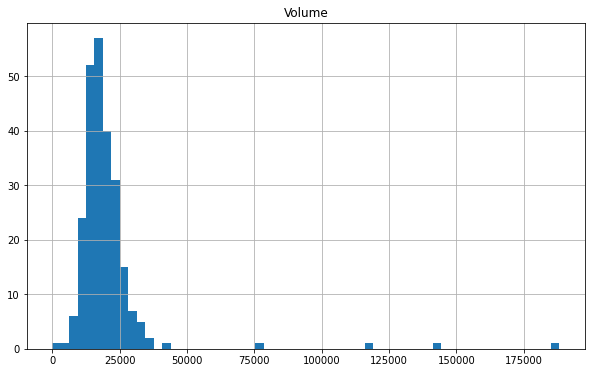

In [208]:
num_df.hist(column= 'Volume',figsize=(10,6),bins=60)
plt.show()

Text(0, 0.5, 'BSESN')

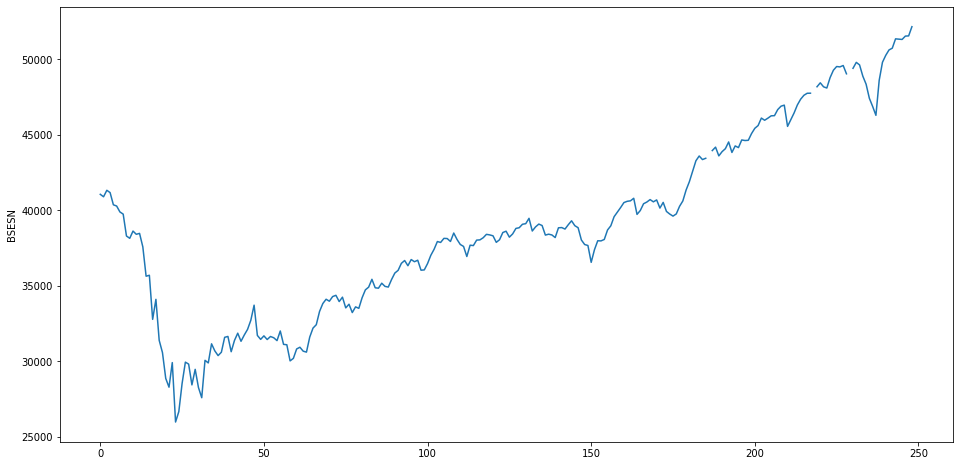

In [209]:
# Figure plot
plt.figure(figsize=(16,8))
num_df['Close'].plot()
plt.ylabel('BSESN')

This leads me to believe that most reviews will be slightly positive.

# Textual analysis- Preprocessing

In [43]:
news_df= pd.read_csv('india-news-headlines.csv')
news_df.head(5)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [44]:
news_df.drop('headline_category', axis = 1, inplace=True)

In [ ]:
#set date format
news_df["publish_date"] = pd.to_datetime(news_df["publish_date"],format='%Y%m%d')
news_df.info()

In [67]:
#merging headline text if multiples for a single date
news_df= news_df.groupby('publish_date').agg({'headline_text': ','.join }).reset_index()

In [183]:
news_df = news_df.drop_duplicates()

In [69]:
print (news_df.headline_text[1])

Status quo will not be disturbed at Ayodhya; says Vajpayee,Fissures in Hurriyat over Pak visit,America's unwanted heading for India?,For bigwigs; it is destination Goa,Extra buses to clear tourist traffic,Dilute the power of transfers; says Riberio,Focus shifts to teaching of Hindi,IT will become compulsory in schools,Move to stop freedom fighters' pension flayed,Gilani claims he applied for passport 2 years ago,Parivar dismisses PM's warning,India; Pak exchange lists of N-plants,Will Qureshi's return really help the govt?,PM's tacit message: Put Ram tample on hold,Text of the Prime Minister's article,NCW to focus on violence against women,BBC's reality TV will focus on AIIMS,Jaitley firm on legal reforms,Hoshangabad farmers have enough water,BJP jumps into rail track conversion issue,America's unwanted heading for India?,State may take AP to court over Krishna,This official has sued the briber,Park turns temple compound as residents watch,Moves afoot to evict squatters in Urban dist,M

In [ ]:
#check if there is any null values
news_df.isnull().sum()

In [216]:
#removing unwanted characters from the headlines
news_df.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
news_df["headline_text"].head(3)

publish_date
2001-01-01    win over cena satisfying but defeating underta...
2001-01-02    Status quo will not be disturbed at Ayodhya  s...
2001-01-03    Powerless north India gropes in the dark Think...
Name: headline_text, dtype: object

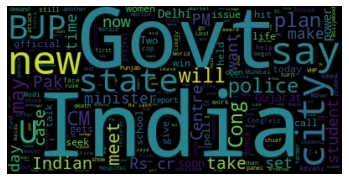

In [80]:
#wordcloud for first 1000 lines
import nltk
from nltk.corpus import stopwords

# Creating stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

#top 1000 headlines
textt = " ".join(review for review in news_df.headline_text[:1000])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [217]:
news_df.headline_text

publish_date
2001-01-01    win over cena satisfying but defeating underta...
2001-01-02    Status quo will not be disturbed at Ayodhya  s...
2001-01-03    Powerless north India gropes in the dark Think...
2001-01-04    The string that pulled Stephen Hawking to Indi...
2001-01-05    Light combat craft takes India into club class...
                                    ...                        
2020-06-26    Containment zone residents slam high prices ch...
2020-06-27    like me i wont let you have a toxic relationsh...
2020-06-28    Atanu Ghosh plans to rewrite old scripts to ma...
2020-06-29      hot and stylish bikini looks of Katrina Kaif...
2020-06-30    Detective Byomkesh Bakshy  Edge of Tomorrow Fi...
Name: headline_text, Length: 7080, dtype: object

# Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score, so lets make columns with these values.

In [141]:
#unsupervised lexicon-based approach

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity


In [ ]:
news_df['Subjectivity'] = news_df['headline_text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['headline_text'].apply(getPolarity)
news_df

In [145]:
from sklearn.preprocessing import MinMaxScaler
sia = SentimentIntensityAnalyzer()


news_df['Compound'] = [sia.polarity_scores(v)['compound'] for v in news_df['headline_text']]
news_df['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_df['headline_text']]
news_df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news_df['headline_text']]
news_df['Positive'] = [sia.polarity_scores(v)['pos'] for v in news_df['headline_text']]
news_df

,headline_text,compound,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
publish_date,,,,,,,,
2001-01-01,win over cena satisfying but defeating underta...,headline_text,0.633333,0.433333,-0.0000,0.230,0.473,0.297
2001-01-02,Status quo will not be disturbed at Ayodhya s...,headline_text,0.286859,0.143590,-0.9792,0.121,0.809,0.071
2001-01-03,Powerless north India gropes in the dark Think...,headline_text,0.392857,0.089286,-0.8910,0.156,0.735,0.109
2001-01-04,The string that pulled Stephen Hawking to Indi...,headline_text,0.445360,0.093039,0.7543,0.104,0.792,0.104
2001-01-05,Light combat craft takes India into club class...,headline_text,0.480553,0.264024,0.9365,0.142,0.696,0.161
...,...,...,...,...,...,...,...,...
2020-06-26,Containment zone residents slam high prices ch...,headline_text,0.377957,0.060128,-0.9999,0.169,0.739,0.092
2020-06-27,like me i wont let you have a toxic relationsh...,headline_text,0.390221,0.080373,-0.9999,0.162,0.744,0.095
2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,headline_text,0.397919,0.058824,-0.9999,0.152,0.772,0.076


# Prediction

In [240]:
from sklearn.preprocessing import MinMaxScaler

data= num_df.join(news_df)

In [241]:
data = data[['Polarity', 'Close']]
data['Polarity'] = data['Polarity'].replace(np.nan, 0)
print(data.head())
print(data.isna().sum())

   Polarity         Close
0       0.0  41055.691406
1       0.0  40894.378906
2       0.0  41323.000000
3       0.0  41170.121094
4       0.0  40363.230469
Polarity    0
Close       3
dtype: int64


In [243]:
data_train, data_test = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

In [250]:
def create_dataset(dataset, score_text_blob, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		b = score_vader[i+look_back]
		dataX.append(np.append(a,b))
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [251]:
data_scaling1 = MinMaxScaler(feature_range=(0,1))
data_train_scaled = data_scaling1.fit_transform(data_train['Close'].values.reshape(-1, 1))
data_test_scaled = data_scaling1.transform(data_test['Close'].values.reshape(-1, 1))

data_scaling2 = MinMaxScaler()
training_compound_scaled = data_scaling2.fit_transform(data_train['Polarity'].values.reshape(-1, 1))
test_compound_scaled = data_scaling2.transform(data_test['Polarity'].values.reshape(-1, 1))

In [253]:


# creating dataset with the last 45 days historic data and sentiments score of todays news headlines
train_x, train_y = create_dataset(data_train_scaled, training_compound_scaled, 45)
test_x, test_y = create_dataset(data_test_scaled, test_compound_scaled, 45)



NameError: ignored

In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)


NameError: ignored

# Testing

In [ ]:
print('MSE: ',mean_squared_error(prediction,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))

SS_Residual = sum((y_test-prediction)**2)
SS_Total = sum((y_test-np.mean(y_test))**2) 
r_squared = 1 - (float(SS_Residual))/SS_Total
print('R Squared:', r_squared)